In [46]:
import pandas as pd

c = pd.read_csv("https://raw.githubusercontent.com/blakocha/ADRPY2025/refs/heads/main/cointosses.csv").dropna()
display(c)

,Unnamed: 0,toss,fake,pierwszy_O,liczba_serii,liczba_O,max_seria,runtest_z,sd10,sum_2max,sum_3max,sum_4max,sum_5max,sum_6max,sum_7max,count_1
0,1,ORRROROOROOOORORROROORRRORORORORROROORRORRROOR...,1,1,60,49,5,1.713364,0.073786,10,14,18,21,24,27,36
1,2,OORORRRROORROROOROROROOOOORRRRORORROOORROORROR...,1,1,52,50,5,0.100509,0.000000,10,15,19,23,27,31,28
2,3,RROOROOOORORORORRROOORROOROROROOOORRORORORRROR...,1,0,56,51,4,0.908968,0.073786,8,11,14,17,20,23,26
3,4,OORRROOORRRORROOROOOORRROROROORORROOORRRRROOOO...,1,1,50,48,5,-0.084564,0.063246,10,14,18,21,24,27,21
4,5,OROROORROROOORRROORRORRROROOROORROORROOOOORORR...,1,1,60,48,5,1.727525,0.091894,9,12,15,18,21,24,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,522,RORROOOORROOROOROROOOROOOOOOORRROOORRRRRROOOOR...,0,0,47,55,7,-0.609208,0.164992,13,18,22,26,30,34,24
520,523,ORORROROROOOORRRRORROOOOOOORROORRRORRRRROOOOOR...,0,1,55,50,7,0.703562,0.149071,12,17,21,25,28,31,31
521,524,RRROOORRRRORROORRRORROOOOOOOROOOOORRRRORROOORR...,0,0,42,42,7,-1.489879,0.175119,13,18,23,27,31,35,19
522,525,RORROROOOROOOORRRRRORRRORRRORORRROORRRRROOOROR...,0,0,48,44,8,-0.363094,0.134990,14,19,24,28,32,36,27


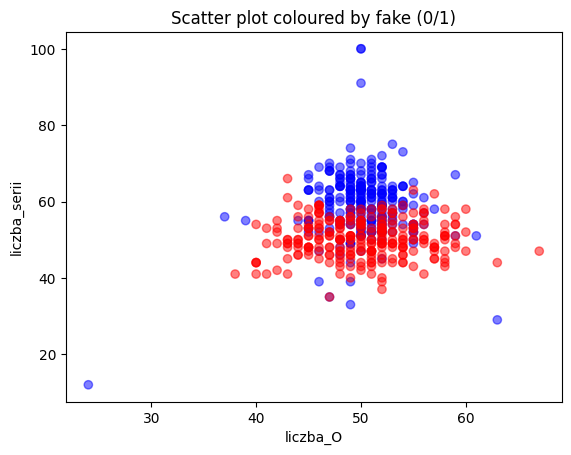

In [47]:
# Scatter plot: x - liczba_O, y - liczba_serii, colour - fake (0/1)
import matplotlib.pyplot as plt
plt.scatter(
    c['liczba_O'],
    c['liczba_serii'],
    c = c['fake'].map({0: 'red', 1: 'blue'}), 
    alpha = 0.5
)

plt.xlabel('liczba_O')
plt.ylabel('liczba_serii')
plt.title('Scatter plot coloured by fake (0/1)')

plt.show()

In [48]:
import plotly.express as px

fig = px.scatter_3d(
    c,
    x='liczba_O',
    y='liczba_serii',
    z='sum_3max',
    color=c['fake'].astype(str),  # categorical coloring
    opacity=0.6
)

fig.update_layout(
    scene=dict(
        xaxis=dict(range=[30, 70]),
        yaxis=dict(range=[25, 80]),
        zaxis=dict(range=[5, 40])
    )
)

fig.update_traces(marker=dict(size=4))
fig.show()

In [49]:
X = c.drop(columns=["fake", "toss", "Unnamed: 0"])
y = c["fake"]
print(X)

     pierwszy_O  liczba_serii  liczba_O  max_seria  runtest_z      sd10  \
0             1            60        49          5   1.713364  0.073786   
1             1            52        50          5   0.100509  0.000000   
2             0            56        51          4   0.908968  0.073786   
3             1            50        48          5  -0.084564  0.063246   
4             1            60        48          5   1.727525  0.091894   
..          ...           ...       ...        ...        ...       ...   
519           0            47        55          7  -0.609208  0.164992   
520           1            55        50          7   0.703562  0.149071   
521           0            42        42          7  -1.489879  0.175119   
522           0            48        44          8  -0.363094  0.134990   
523           1            51        47          6   0.000000  0.216282   

     sum_2max  sum_3max  sum_4max  sum_5max  sum_6max  sum_7max  count_1  
0          10        14 

In [50]:
# Train / validation split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=120/524, random_state=42, stratify=y
)

print(y.mean())
print(y_train.mean())
print(y_valid.mean())

0.5
0.5
0.5


In [51]:
from sklearn.preprocessing import StandardScaler

# z-score-standardization: z = (x-mean)/sd
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [52]:
print(X_train_scaled[:, 1].mean())
print(X_train_scaled[:, 1].std())

print(X_valid_scaled[:, 1].mean())
print(X_valid_scaled[:, 1].std())


-2.1984614349013e-18
1.0
0.005650219539007349
1.0897445951180285


In [77]:
import numpy as np
N = X_train.shape[0]
k_start = int(np.sqrt(N))
print(k_start)

20


In [78]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = k_start)   # you can tune this
knn.fit(X_train_scaled, y_train)

,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [79]:
y_pred = knn.predict(X_valid_scaled)
v = pd.DataFrame({"pred": y_pred, "actual": y_valid})

# Accuracy
(v['pred']==v['actual']).mean()

np.float64(0.8666666666666667)

In [80]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate
print("Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        60
           1       0.96      0.77      0.85        60

    accuracy                           0.87       120
   macro avg       0.88      0.87      0.87       120
weighted avg       0.88      0.87      0.87       120



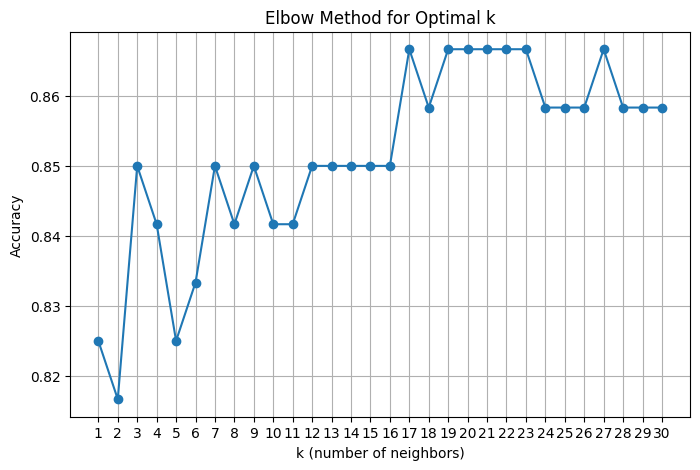

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 31)      # try k = 1 … 30 (adjust if needed)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_valid_scaled)
    scores.append(accuracy_score(y_valid, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

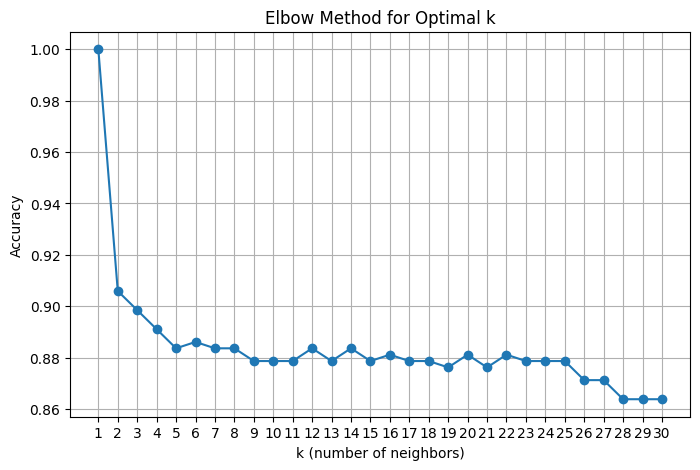

In [85]:
k_values = range(1, 31)      # try k = 1 … 30 (adjust if needed)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_train_scaled)
    scores.append(accuracy_score(y_train, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

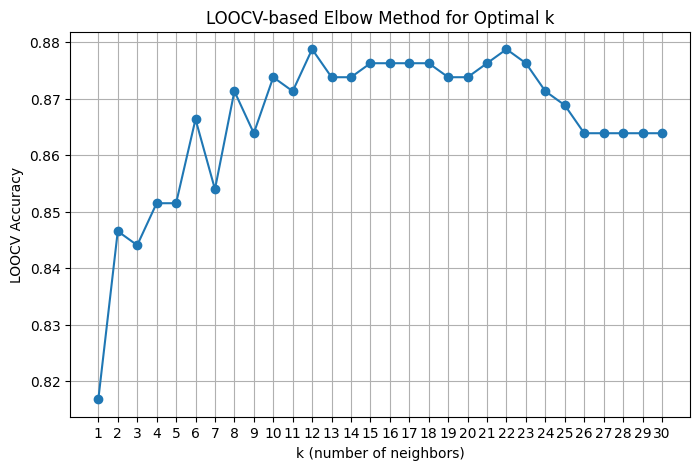

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

loo = LeaveOneOut()

k_values = range(1, 31)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # LOOCV accuracy (mean of accuracy scores)
    cv_score = cross_val_score(knn, X_train_scaled, y_train, cv=loo, scoring='accuracy')
    scores.append(cv_score.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o')
plt.xlabel("k (number of neighbors)")
plt.ylabel("LOOCV Accuracy")
plt.title("LOOCV-based Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()